# Section 1：空间分布

In [2]:
from function import *
import pandas as pd
import pandas as pd
import geopandas as gpd
from typing import Sequence
import xarray as xr


abandon_2d_variable = [
    "current_abandonment",
    "recultivation", 
    "abandonment_duration",
    "abandonment_year"
]
fea_3d_variable = [
    'GDPpc',
    'GDPtot',
    'GURdist',
    'Population',
    'gdmp',
    'rsds',
    'tas',
    'wind'
]
fea_2d_variable = [
    'DEM',
    'Powerdist',
    'PrimaryRoad',
    'SecondaryRoad',
    'Slope',
    'TertiaryRoad'
]
PATHS = {
    'abandonment': r"D:\xarray\merged_chunk_2\*.nc",
    'feature':     "D:/xarray/aligned2/Feature_all/*.nc",
    'csv':         "aligned_for_training0519.csv",
    'prediction':  "",
    'prediction_us': "",
    'test_output': "positive_samples_test_500.csv",
    'output':      "positive_samples_full_with_features.csv",
    'CN_sheng': r'data\sheng2022.shp',
    'World_shp': r'data\main_ADM_0.shp', 
    'us_abandon': r'data\us_abandon_clean.csv',
    'us_pv_embedding': r'data\training_embedding.csv'
}

ZERO_COLS = [
     'GDPpc', 'GDPtot', 'GURdist', 'Population',
    'PrimaryRoad', 'SecondaryRoad', 'TertiaryRoad', 'gdmp'
]
YEARS = [2018, 2020]

NUMERIC_FEATURES = [
    'lat','lon','GDPpc', 'GDPtot', 'GURdist', 'DEM','Slope',
    'Population','Powerdist','PrimaryRoad','SecondaryRoad','TertiaryRoad',
    'gdmp','rsds','tas','wind'
]
CAT_COLS = ['landcover']

ABANDON_COLS = ['abandonment_year','abandonment_duration', 'current_abandonment']

NONE_ABANDON_COLS = ['recultivation']

time=['2018-01-01','2020-01-01']

ds_abandon, ds_feat = load_datasets(
    PATHS['abandonment'], PATHS['feature']
)

ds_merge=xr.merge([ds_abandon, ds_feat])        
for var in ds_merge.data_vars:
    if 'time' not in ds_merge[var].dims:
        # Expand the variable to have time dimension with same values
        ds_merge[var] = ds_merge[var].expand_dims(time=ds_merge.time)


c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


gogogo


c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 43
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 174
  result = blockwise(
c:\Users\zpy10\Anaconda3\envs\geo\Lib\site-packages\dask\array\core.py:4998: PerformanceWarning: Increasing number of chunks by factor of 14
  result = blockwise(
c:\Users\zpy10\Anacon

## 1.1 全球撂荒空间

C:\Users\zpy10\AppData\Local\Temp\ipykernel_35364\2459406966.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  lat=int(ds_abandon.dims['lat']/1000),
C:\Users\zpy10\AppData\Local\Temp\ipykernel_35364\2459406966.py:24: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  lon=int(ds_abandon.dims['lon']/1500),
C:\Users\zpy10\AppData\Local\Temp\ipykernel_35364\2459406966.py:29: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please

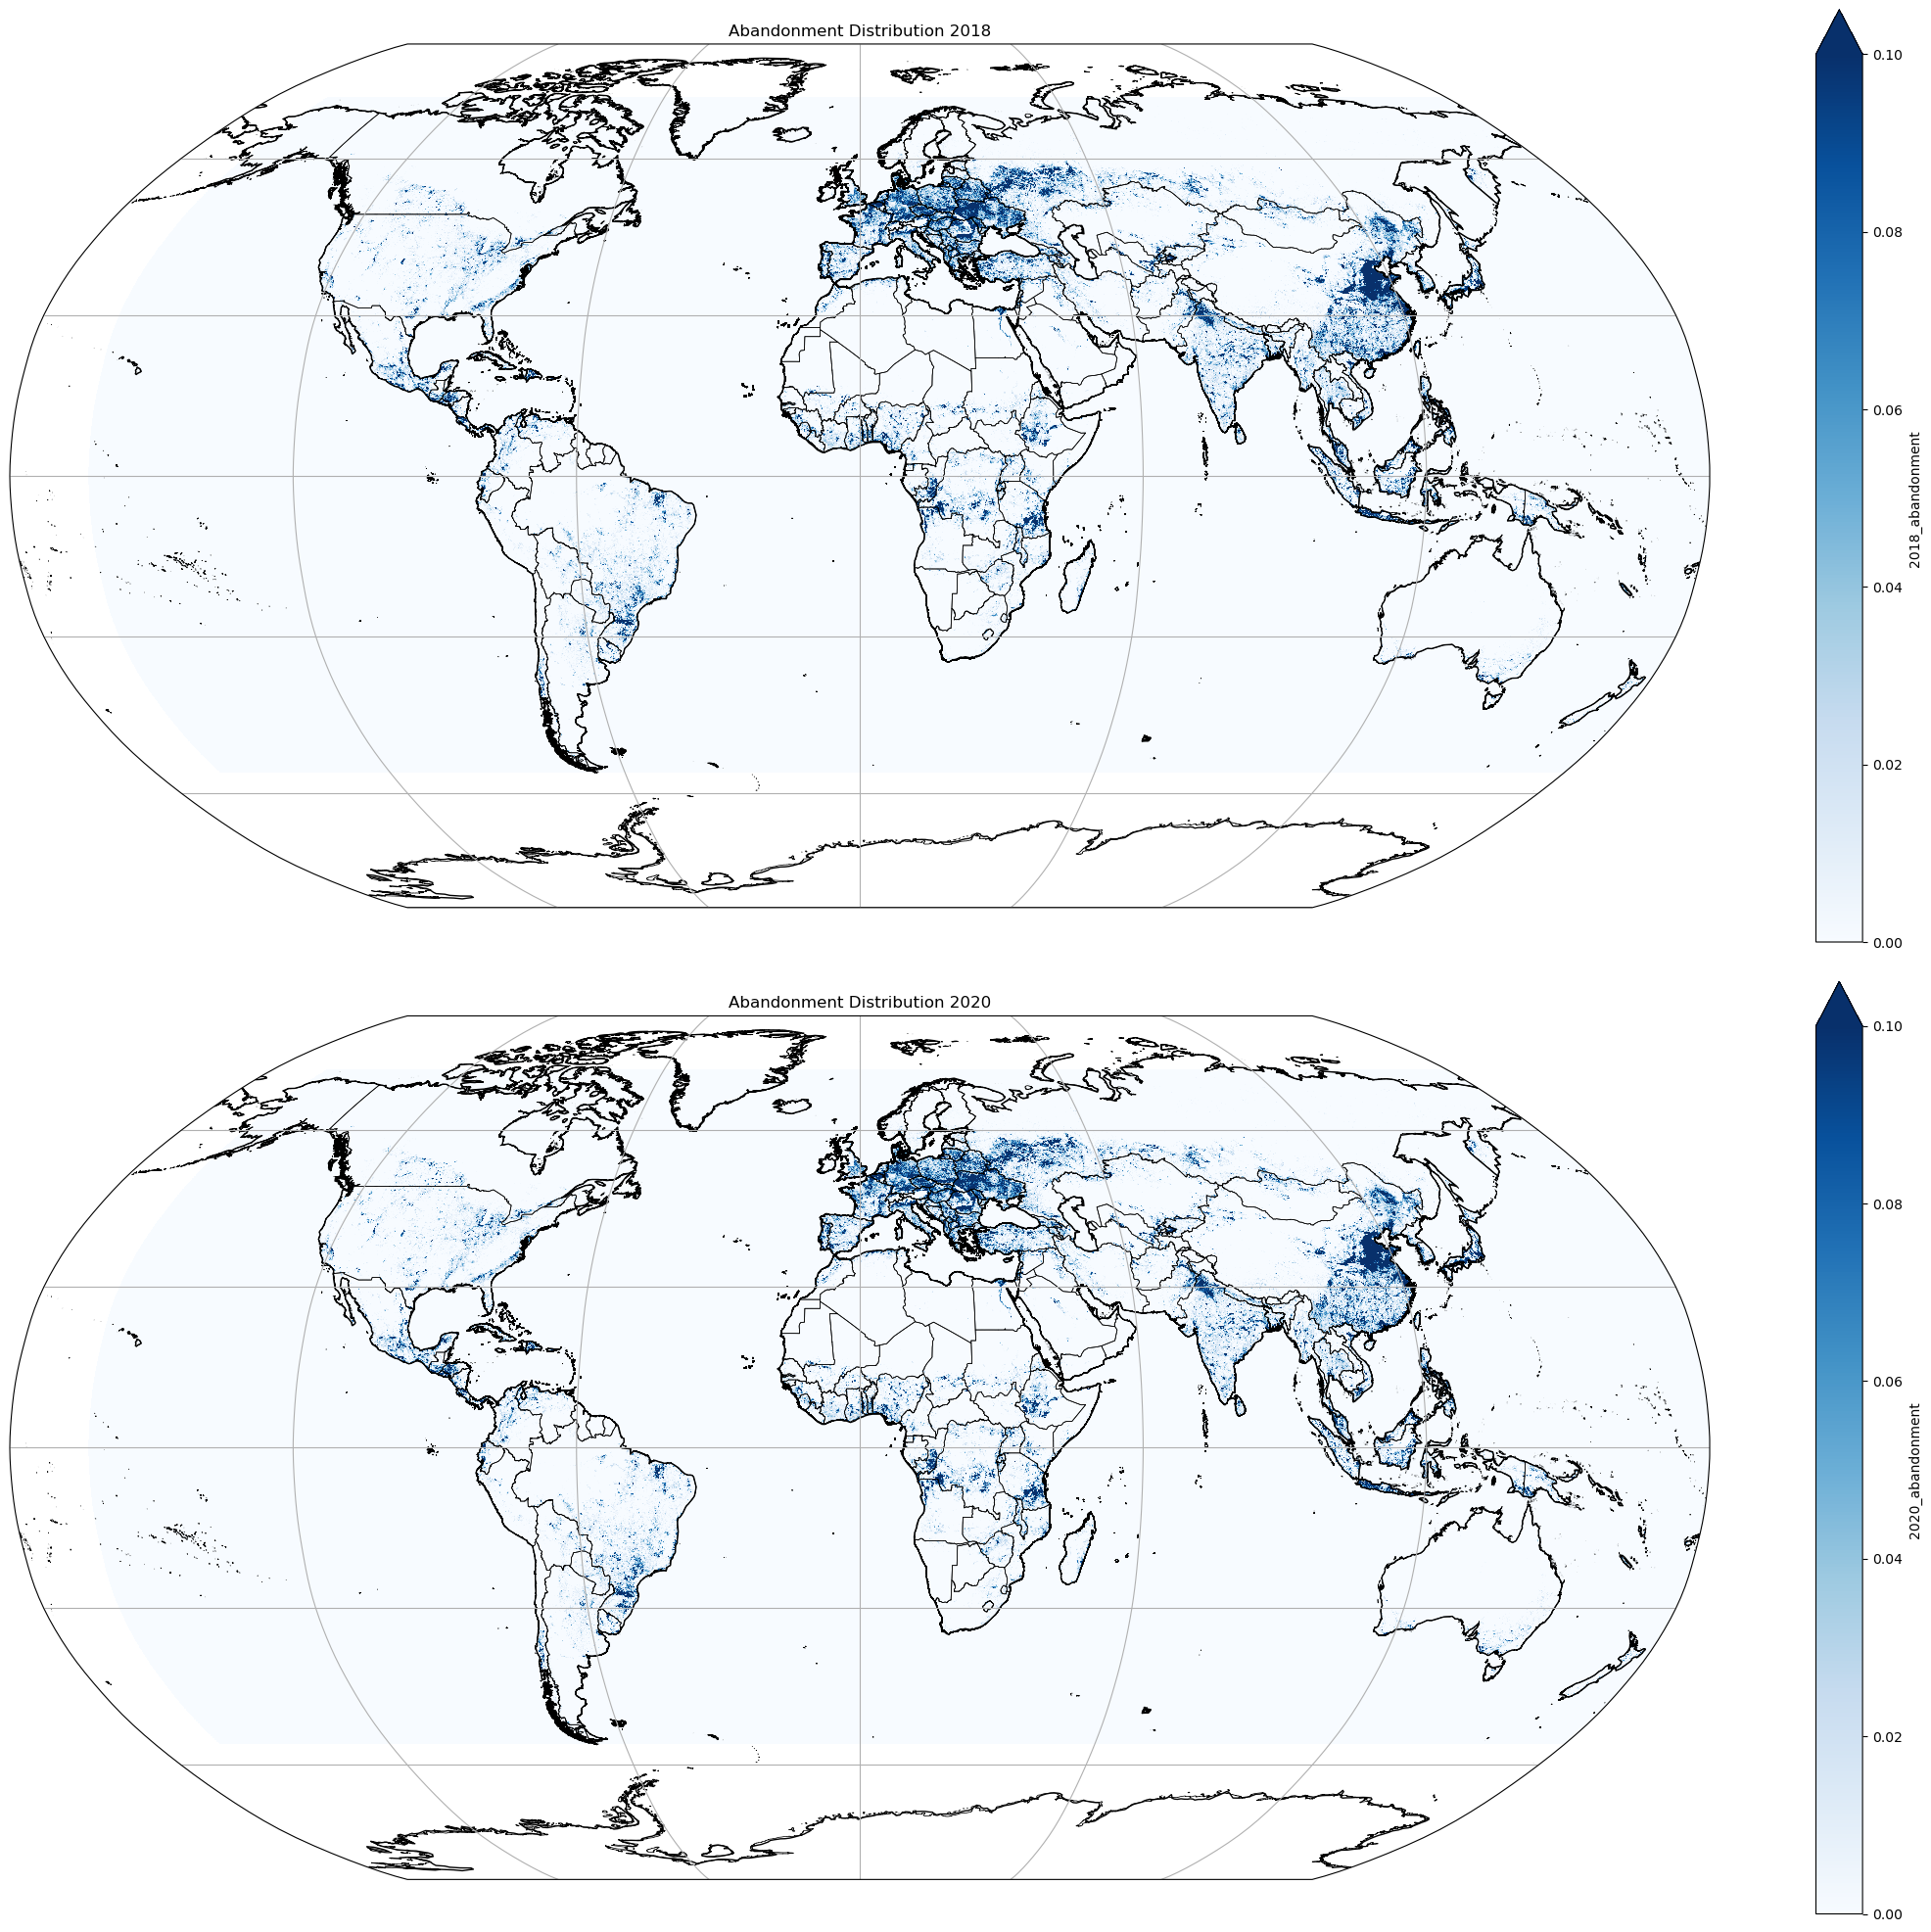

In [3]:
import os
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Load datasets
# ds_abandon, ds_feat = load_datasets(
#     PATHS['abandonment'], PATHS['feature']
# )

# Calculate abandonment for 2018 and 2020
ds_abandon['2018_abandonment'] = (
    (ds_abandon.abandonment_year + ds_abandon.abandonment_duration - 1 >= 2018)
).astype(int)

ds_abandon['2020_abandonment'] = (
    (ds_abandon.abandonment_year + ds_abandon.abandonment_duration - 1 >= 2020)
).astype(int)

# Coarsen the data
coarsened_2018 = ds_abandon['2018_abandonment'].coarsen(
    lat=int(ds_abandon.dims['lat']/1000), 
    lon=int(ds_abandon.dims['lon']/1500),
    boundary='trim'
).mean()

coarsened_2020 = ds_abandon['2020_abandonment'].coarsen(
    lat=int(ds_abandon.dims['lat']/1000), 
    lon=int(ds_abandon.dims['lon']/1500),
    boundary='trim'
).mean()

# Load world shapefile
world = gpd.read_file(PATHS['World_shp'])

# Create figure with two subplots using cartopy projection
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 20), 
                              subplot_kw={'projection': ccrs.Robinson()})

# Plot 2018 data
coarsened_2018.plot(transform=ccrs.PlateCarree(),
                    cmap='Blues', vmin=0, vmax=0.1, ax=ax1)
world.boundary.plot(ax=ax1, color='black', linewidth=0.5, 
                   transform=ccrs.PlateCarree())
ax1.set_title('Abandonment Distribution 2018')
ax1.coastlines()
ax1.gridlines()

# Plot 2020 data
coarsened_2020.plot(transform=ccrs.PlateCarree(),
                    cmap='Blues', vmin=0, vmax=0.1, ax=ax2)
world.boundary.plot(ax=ax2, color='black', linewidth=0.5,
                   transform=ccrs.PlateCarree())
ax2.set_title('Abandonment Distribution 2020')
ax2.coastlines()
ax2.gridlines()

# Adjust layout
plt.tight_layout()


## 1.2 美国撂荒空间

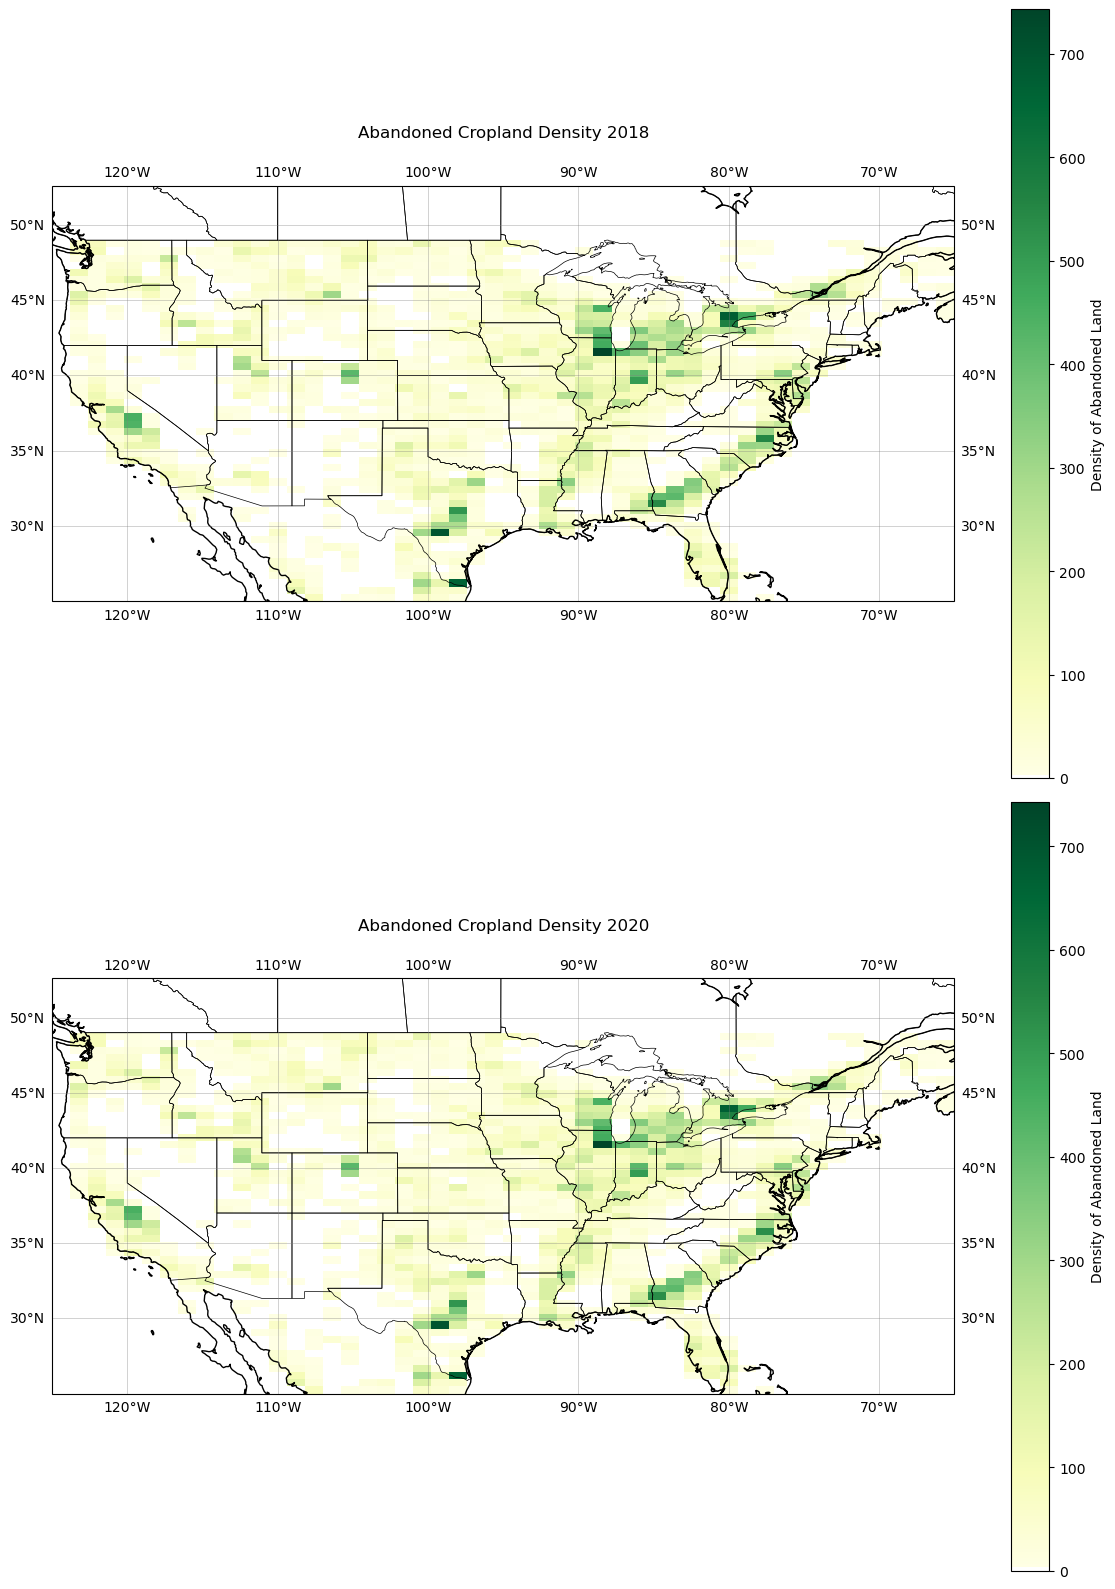

In [22]:
import geopandas as gpd
from function import *
from FeatureInsight import struct_Investigation,univar_dis,bivar_dis
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# 加载世界shp定义边界
# world = gpd.read_file(PATHS['World_shp'])
# world_bound = world.to_crs(ds_abandon.rio.crs)


# 定义图形的边界避免溢出
usa_bounds_main = {
        'lon_min': -125,  # 美国本土最西端（华盛顿州）
        'lon_max': -65,   # 美国本土最东端（缅因州）
        'lat_min': 25,    # 美国本土最南端（佛罗里达州）
        'lat_max': 49     # 美国本土最北端（与加拿大接壤）
    }
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])
    # 创建mask - 选择2020年废弃的栅格
abandonment_year = ds_merge['abandonment_year'].sel(
    time='2020-01-01',
    lat=slice(usa_bounds_main['lat_min'], usa_bounds_main['lat_max']),
    lon=slice(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
)

abandonment_duration = ds_merge['abandonment_duration'].sel(
    time='2020-01-01', 
    lat=slice(usa_bounds_main['lat_min'], usa_bounds_main['lat_max']),
    lon=slice(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
)

mask_main_2020 = ((abandonment_year + abandonment_duration - 2) >= 2020)
mask_main_2018 = ((abandonment_year + abandonment_duration - 2) >= 2018)

world = gpd.read_file(PATHS['World_shp'])
us_main = world.clip(bbox)
# 重新处理数据和绘图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16), 
                              subplot_kw={'projection': ccrs.PlateCarree()})

# 使用更鲜明的颜色和更高的对比度
colors = ['white', 'darkgreen']
cmap = ListedColormap(colors)

# 获取经纬度值
lats = mask_main_2018.lat.values
lons = mask_main_2018.lon.values

# 确保经纬度范围匹配美国大陆
mask_2018 = mask_main_2018.values
mask_2020 = mask_main_2020.values

# 创建网格密度数据
def create_density_grid(mask, lons, lats, bins=(50,50)):
    valid_points = np.where(mask)
    H, xedges, yedges = np.histogram2d(
        lons[valid_points[1]], 
        lats[valid_points[0]], 
        bins=bins,
        range=[[usa_bounds_main['lon_min'], usa_bounds_main['lon_max']], 
               [usa_bounds_main['lat_min'], usa_bounds_main['lat_max']]]
    )
    return H.T, xedges, yedges

# 计算密度网格
density_2018, xedges_2018, yedges_2018 = create_density_grid(mask_2018, lons, lats)
density_2020, xedges_2020, yedges_2020 = create_density_grid(mask_2020, lons, lats)

# 设置颜色映射
colors = plt.cm.YlGn(np.linspace(0, 1, 256))  
colors[0] = [1, 1, 1, 1]  # 将最低值设为白色
custom_cmap = ListedColormap(colors)

# 2018年图
ax1.set_extent([usa_bounds_main['lon_min'], usa_bounds_main['lon_max'],
                usa_bounds_main['lat_min'], usa_bounds_main['lat_max']])
ax1.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
ax1.coastlines(resolution='50m')

im1 = ax1.pcolormesh(xedges_2018, yedges_2018, density_2018,
                     cmap=custom_cmap,
                     transform=ccrs.PlateCarree(),
                     norm=plt.Normalize(vmin=0, vmax=np.max(density_2018)))
ax1.set_title('Abandoned Cropland Density 2018', pad=20)

# 2020年图
ax2.set_extent([usa_bounds_main['lon_min'], usa_bounds_main['lon_max'],
                usa_bounds_main['lat_min'], usa_bounds_main['lat_max']])
ax2.add_feature(cfeature.STATES.with_scale('50m'), linewidth=0.5)
ax2.coastlines(resolution='50m')

im2 = ax2.pcolormesh(xedges_2020, yedges_2020, density_2020,
                     cmap=custom_cmap,
                     transform=ccrs.PlateCarree(),
                     norm=plt.Normalize(vmin=0, vmax=np.max(density_2020)))
ax2.set_title('Abandoned Cropland Density 2020', pad=20)

# 添加colorbar
cbar1 = plt.colorbar(im1, ax=ax1, label='Density of Abandoned Land')
cbar2 = plt.colorbar(im2, ax=ax2, label='Density of Abandoned Land')

# 添加网格线
ax1.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)
ax2.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5)

plt.tight_layout()
plt.show()

# us_df_abandon = load_abandon(PATHS['us_abandon'])
# us_df_embedding = load_embedding(PATHS['us_pv_embedding'])
       
# # Filter df_embedding to only include points within USA mainland bounds
# us_df_embedding = us_df_embedding[
#     (us_df_embedding['lon'] >= usa_bounds_main['lon_min']) & 
#     (us_df_embedding['lon'] <= usa_bounds_main['lon_max']) &
#     (us_df_embedding['lat'] >= usa_bounds_main['lat_min']) & 
#     (us_df_embedding['lat'] <= usa_bounds_main['lat_max'])
# ]

# # 填充缺失值
# us_df_abandon_fill = fill_nonpositive_with_nearest(us_df_abandon)
# us_df_embedding_fill = fill_nonpositive_with_nearest(us_df_embedding)

# # 去除重复值
# us_df_abandon_filtered = filter_duplicates(us_df_abandon_fill, us_df_embedding_fill)
# features_no_coords = [f for f in NUMERIC_FEATURES + CAT_COLS if f not in ['lat', 'lon']]





# Section 2: 特征分布

You want to predict the year: 2020.0


c:\Users\zpy10\Anaconda3\envs\glbcropland\Lib\site-packages\FeatureInsight\structure_Investigation.py:55: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.img_list=[]


There are 10498 instances, 15 cols in total


100%|██████████| 15/15 [00:00<00:00, 223.54it/s]


+---------------+---------+------------------+------------------------+--------------+--------------------------------------------------------------+
| variable      | dtype   | measure_scales   | Unique Count           | Null Count   | thumbnail                                                    |
|---------------+---------+------------------+------------------------+--------------+--------------------------------------------------------------|
| GDPpc         | float64 | numerical Data   | 1519(14.47%) of total  | 0(0.0%)      | [52720.0, 47099.0, 43837.0]                                  |
| GDPtot        | float64 | numerical Data   | 9340(88.97%) of total  | 0(0.0%)      | [296449180.0, 1018844.8, 14814689.0]                         |
| GURdist       | float64 | Categorical Data | 832(7.93%) of total    | 0(0.0%)      | [625053.3, 624572.25, 625054.7]                              |
| DEM           | float64 | numerical Data   | 5743(54.71%) of total  | 0(0.0%)      | [555.5, 82.5,

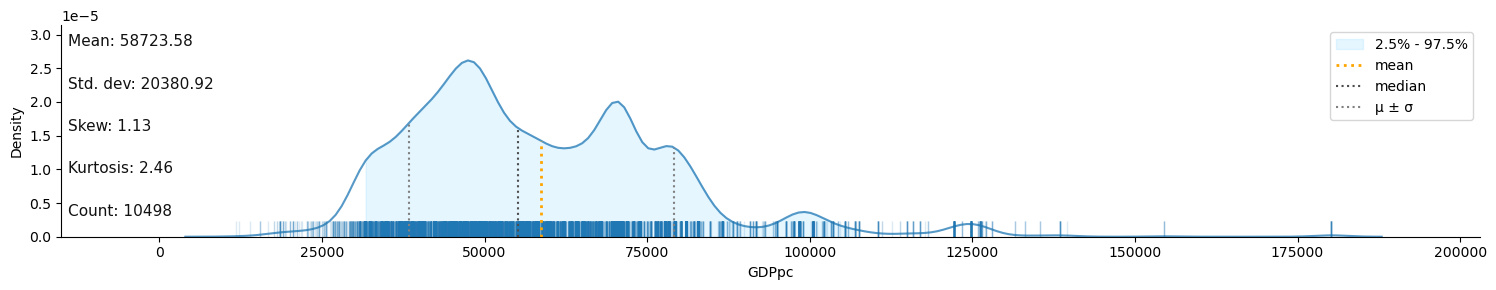

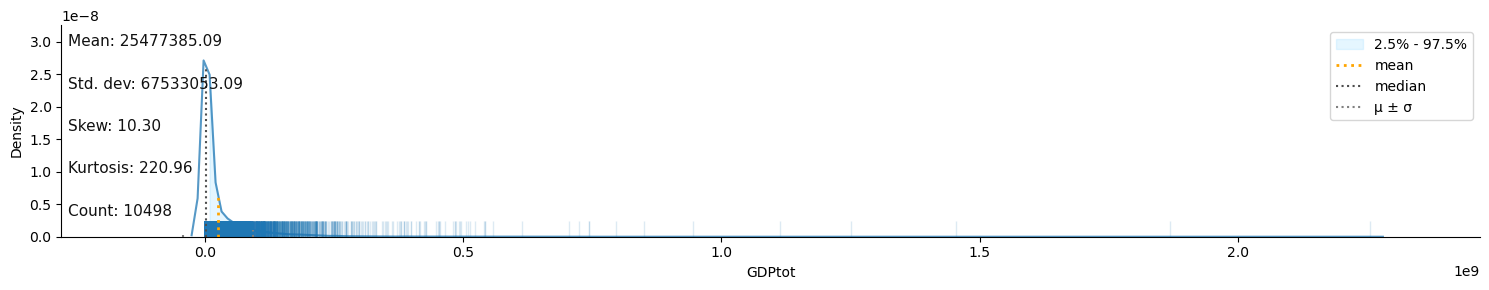

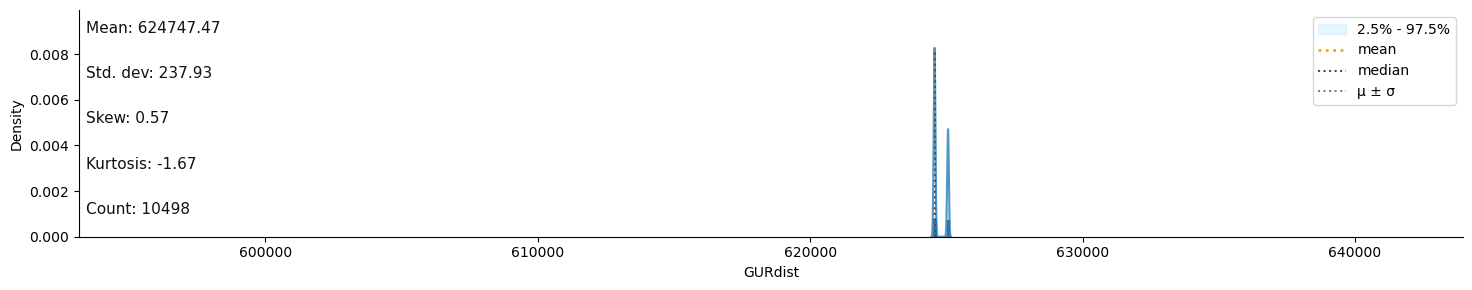

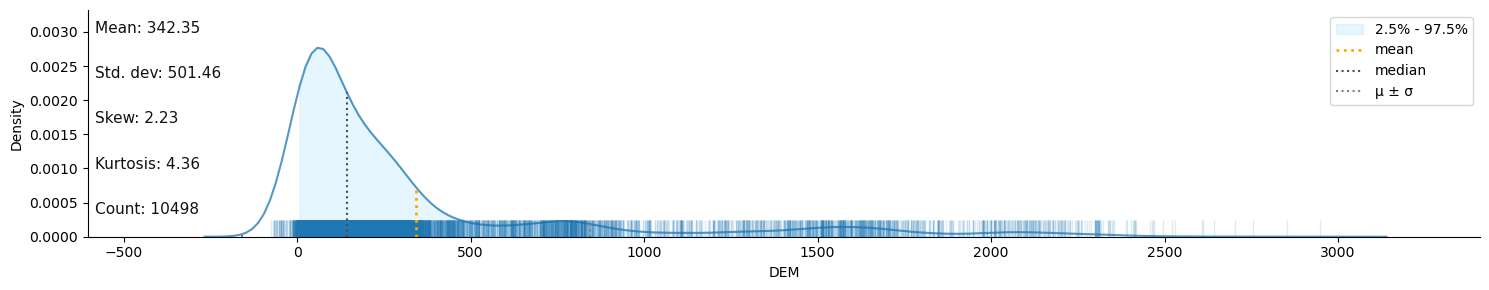

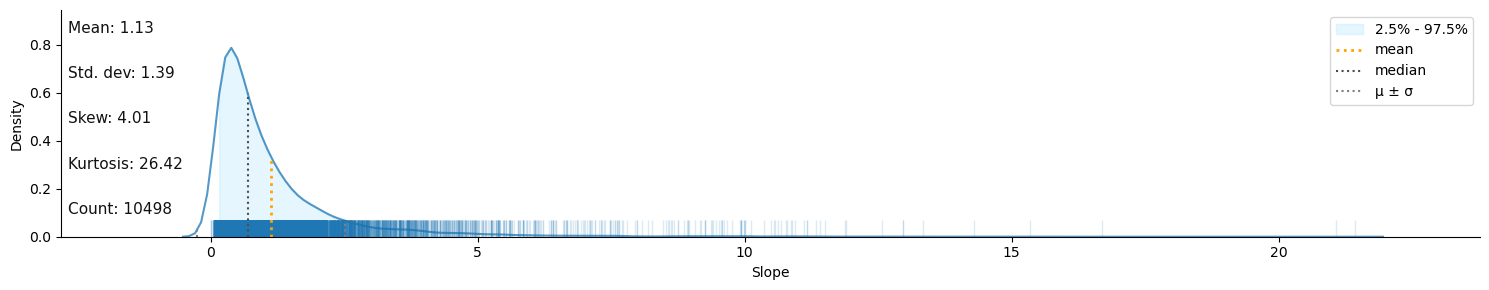

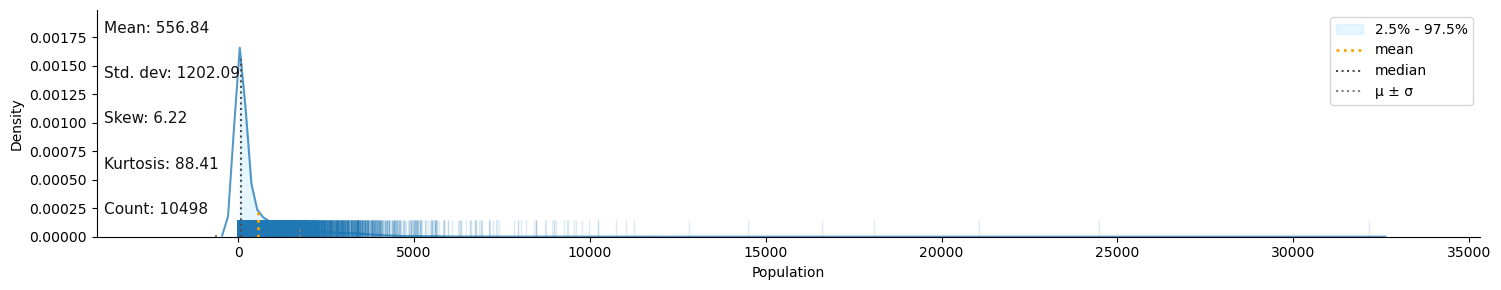

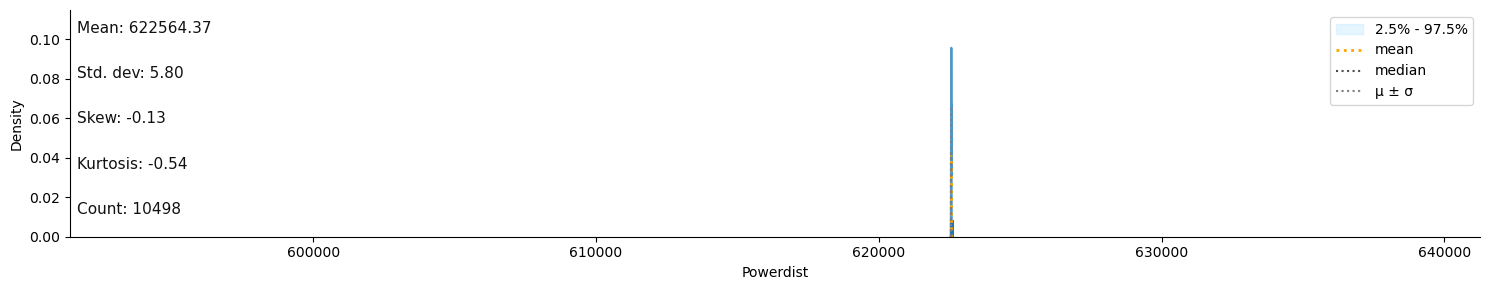

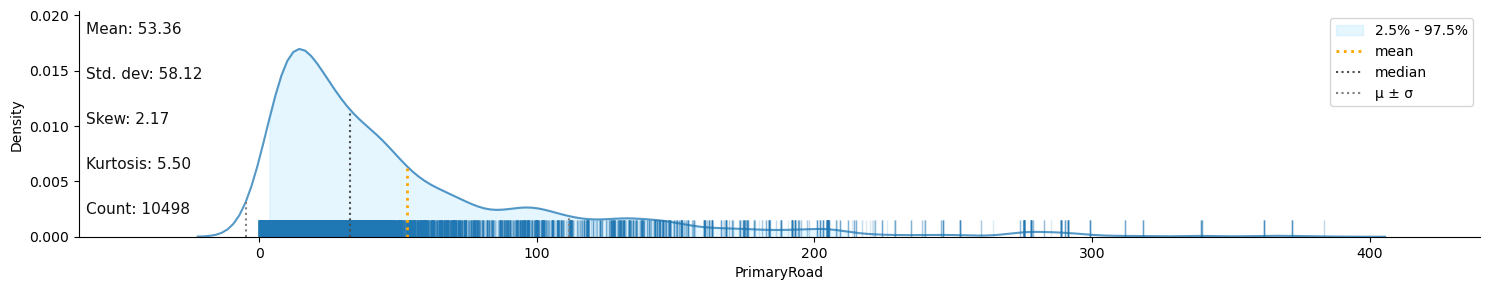

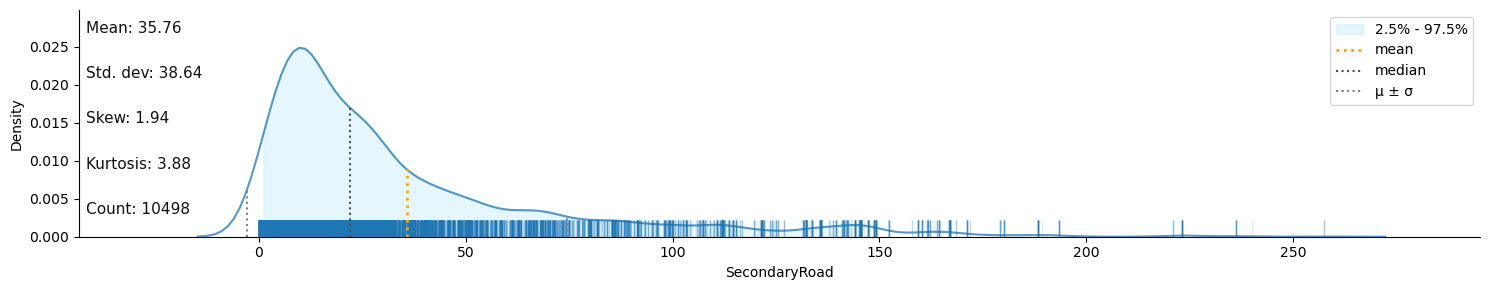

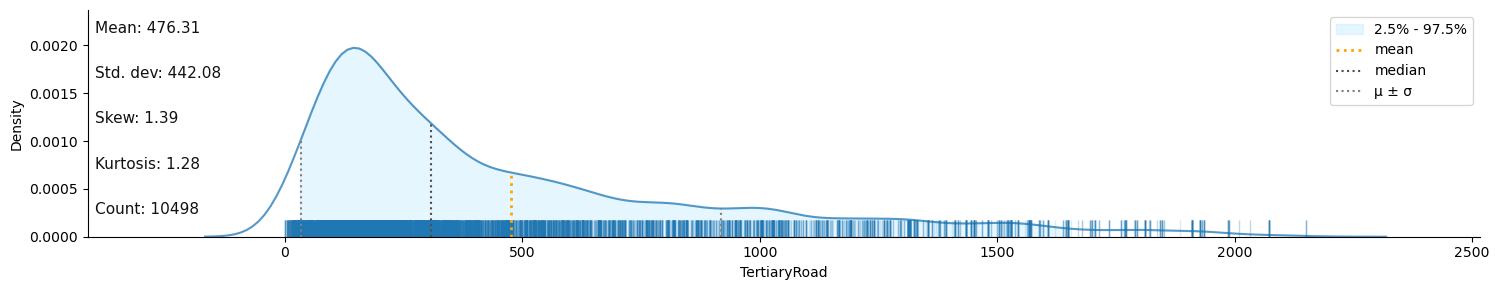

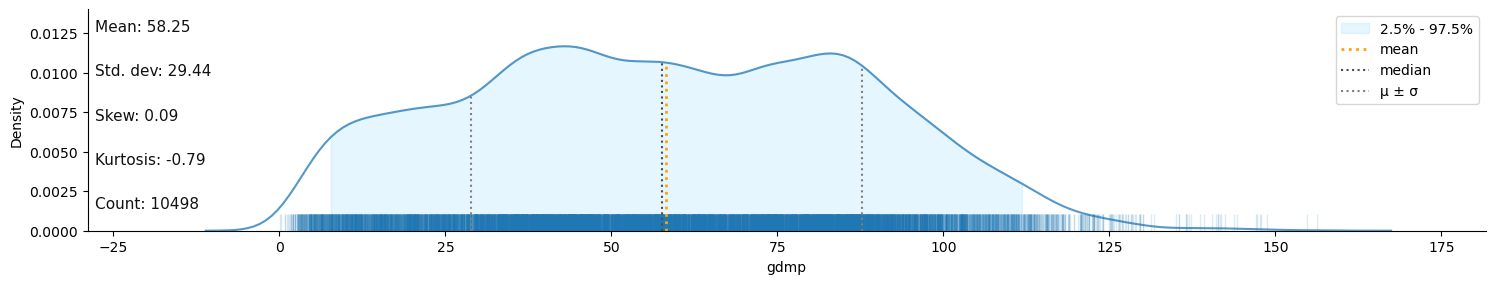

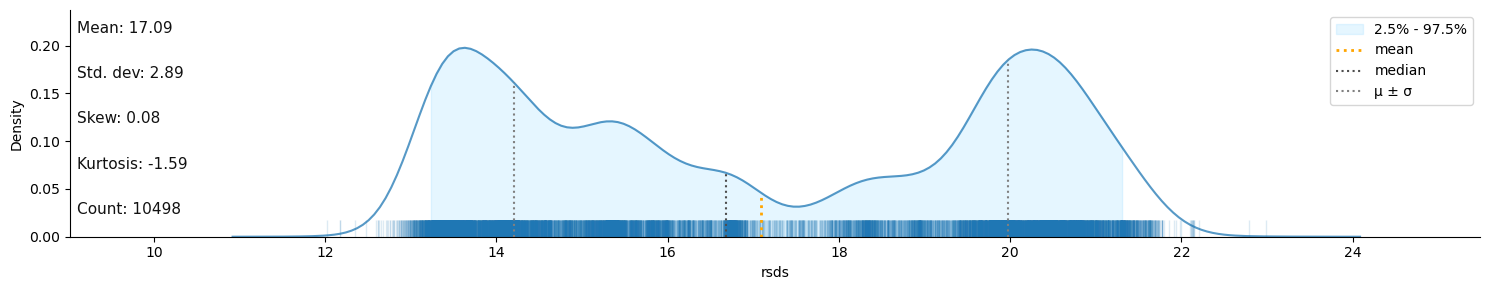

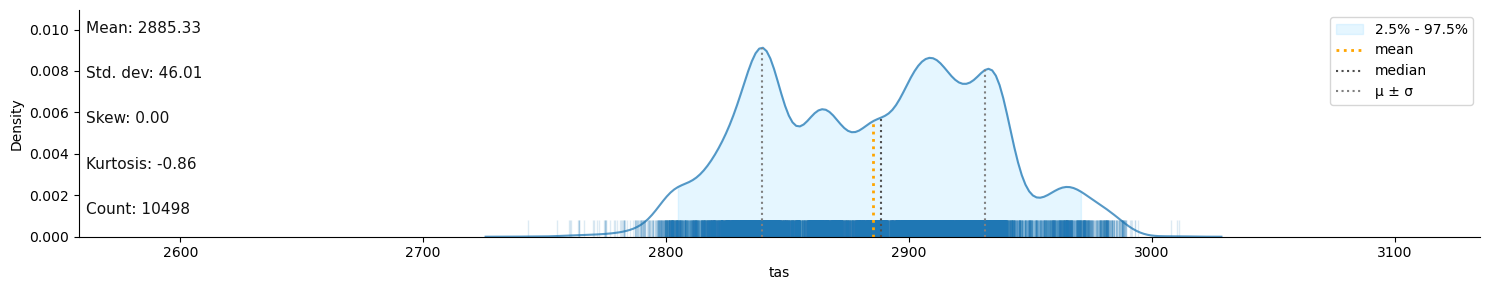

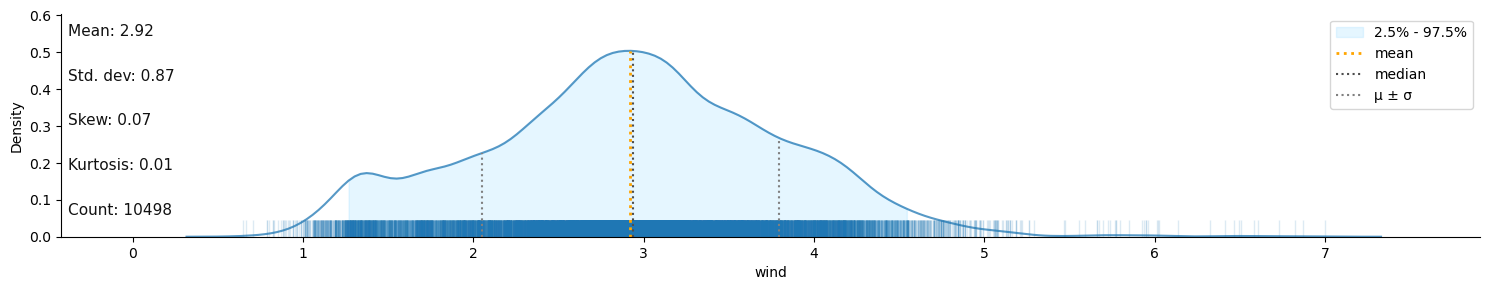

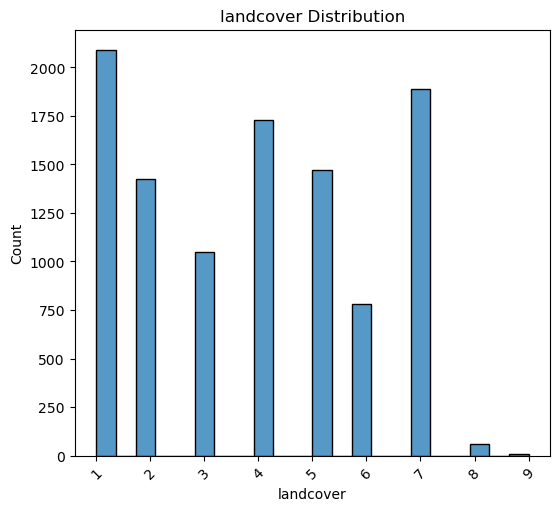

Other features:  []


In [2]:
import geopandas as gpd
from function import *
from FeatureInsight import struct_Investigation,univar_dis,bivar_dis
import klib

# 加载世界shp定义边界
# world = gpd.read_file(PATHS['World_shp'])
# world_bound = world.to_crs(crs=ds_abandon.rio.crs) 


# 定义图形的边界避免溢出
usa_bounds_main = {
        'lon_min': -125,  # 美国本土最西端（华盛顿州）
        'lon_max': -65,   # 美国本土最东端（缅因州）
        'lat_min': 25,    # 美国本土最南端（佛罗里达州）
        'lat_max': 49     # 美国本土最北端（与加拿大接壤）
    }


# 加载数据
us_df_abandon = load_abandon(PATHS['us_abandon'])
us_df_embedding = load_embedding(PATHS['us_pv_embedding'])
       
# Filter df_embedding to only include points within USA mainland bounds
us_df_embedding = us_df_embedding[
    (us_df_embedding['lon'] >= usa_bounds_main['lon_min']) & 
    (us_df_embedding['lon'] <= usa_bounds_main['lon_max']) &
    (us_df_embedding['lat'] >= usa_bounds_main['lat_min']) & 
    (us_df_embedding['lat'] <= usa_bounds_main['lat_max'])
]

# 填充缺失值
us_df_abandon_fill = fill_nonpositive_with_nearest(us_df_abandon)
us_df_embedding_fill = fill_nonpositive_with_nearest(us_df_embedding)

# 去除重复值
us_df_abandon_filtered = filter_duplicates(us_df_abandon_fill, us_df_embedding_fill)
features_no_coords = [f for f in NUMERIC_FEATURES + CAT_COLS if f not in ['lat', 'lon']]

summary=struct_Investigation(us_df_embedding_fill[features_no_coords])
summary.print() 
summary.sort('Unique Count')
univar_dis(us_df_embedding_fill[features_no_coords],us_df_embedding_fill[features_no_coords].columns)

